In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

In [2]:
#Set The Current working directory
os.chdir("C:/Users/Best Lappy/Desktop/EDWISOR/Projects/CFP")

In [3]:
os.getcwd()

'C:\\Users\\Best Lappy\\Desktop\\EDWISOR\\Projects\\CFP'

In [4]:
#Load Data
train = pd.read_csv("train_cab.csv", header = 0, na_values={"passenger_count":"430-","pickup_datetime":"43"})

In [5]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [6]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
#replace 0 with 'nan' in the variables and convert the data wherever required for further operations

train['fare_amount'] = train['fare_amount'].apply(pd.to_numeric,errors ='coerce')
train['fare_amount'] = train['fare_amount'].replace({0:np.nan})
train['passenger_count'] = train['passenger_count'].fillna(0)
train['passenger_count'] = train['passenger_count'].astype(int)
train['passenger_count'] = train['passenger_count'].replace({0:np.nan})
train['pickup_latitude'] = train['pickup_latitude'].replace({0:np.nan})
train['pickup_longitude'] = train['pickup_longitude'].replace({0:np.nan})
train['dropoff_latitude'] = train['dropoff_latitude'].replace({0:np.nan})
train['dropoff_longitude'] = train['dropoff_longitude'].replace({0:np.nan})

In [8]:
train.loc[train['fare_amount'] < 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1.0
13032,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4.0


In [9]:
train.loc[train['passenger_count'] > 6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35 UTC,NaN,NaN,NaN,NaN,236.0
263,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00 UTC,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00 UTC,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00 UTC,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29 UTC,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50 UTC,-73.988977,40.721068,-73.982368,40.732064,345.0


In [10]:
#As the fare amount cannot be negative and a cab cannot hold more than 6 passengers, We drop the irregular observations.
train = train.drop(train[train['passenger_count']>6].index, axis=0)
train = train.drop(train[train['fare_amount']<0].index, axis=0)

In [11]:
train['passenger_count'].unique()

array([ 1.,  2.,  3., nan,  6.,  5.,  4.])

In [12]:
#Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges
print('pickup_longitude above 180={}'.format(sum(train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [13]:
#There's only one outlier which is in variable pickup_latitude.So we will remove it.
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)

In [14]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

# Missing Value Analysis

In [15]:
#calculate missing values

missing_val = pd.DataFrame(train.isnull().sum())
#print(missing_val)

#Reset index
missing_val = missing_val.reset_index()
#print(missing_val)

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})
#print(missing_val)

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['count']/len(train)*100)
#print(missing_val)

#sort in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

           Variables  count  Missing_percentage
0   pickup_longitude    313            1.951007
1    pickup_latitude    313            1.951007
2  dropoff_longitude    312            1.944773
3   dropoff_latitude    310            1.932307
4    passenger_count    113            0.704357
5        fare_amount     25            0.155831
6    pickup_datetime      1            0.006233


# Missing Value Imputation

In [16]:
#As there is only one missing value in pickup_datetime, dropping the row
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)

In [17]:
#missing value imputation
#Actual Value = -73.991875
#Mean = -73.91184936989819
#Median = -73.98204

In [18]:
#save the data with in another place with different name

df = train.copy()
#train = df.copy()

In [19]:
#Create missing value, a small test to identify which method is good for imputation

#train["pickup_longitude"].loc[25]

In [20]:
#train['pickup_longitude'].loc[25] = np.nan

In [21]:
#train['pickup_longitude'].loc[25]

In [22]:
#Mean Imputation
#train['pickup_longitude'] = train['pickup_longitude'].fillna(train['pickup_longitude'].mean())
#train['pickup_longitude'].loc[25]

In [23]:
#Median Imputation
#train['pickup_longitude'] = train['pickup_longitude'].fillna(train['pickup_longitude'].median())
#train['pickup_longitude'].loc[25]

In [24]:
#As it is found Median is very close to Actual Value, we will proceed with imputation via median
train['pickup_longitude'] = train['pickup_longitude'].fillna(train['pickup_longitude'].median())
train['pickup_latitude'] = train['pickup_latitude'].fillna(train['pickup_latitude'].median())
train['dropoff_longitude'] = train['dropoff_longitude'].fillna(train['dropoff_longitude'].median())
train['dropoff_latitude'] = train['dropoff_latitude'].fillna(train['dropoff_latitude'].median())

#And for category variables imputation is done with mode
train['passenger_count'] = train['passenger_count'].fillna(int(train['passenger_count'].mode()))

In [25]:
train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [26]:
#Imputing the NAs in target variables may hamper the model, so it is preferred to remove NA rows of the data
train=train.dropna()

In [27]:
#convert the data type of categorical variable
train['passenger_count']=train['passenger_count'].astype('int').round().astype('object').astype('category')

In [28]:
train.dtypes

fare_amount           float64
pickup_datetime        object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count      category
dtype: object

In [29]:
train.shape

(16017, 7)

# Outlier Analysis

In [30]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,16017.000000,16017.000000,16017.000000,16017.000000,16017.000000
mean,15.028495,-73.913036,40.691100,-73.907946,40.689112
std,430.796594,2.629353,2.584115,2.680561,2.602998
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992157,40.737014,-73.991182,40.736842
50%,8.500000,-73.982040,40.753300,-73.980567,40.754238
75%,12.500000,-73.968438,40.767380,-73.965875,40.768026
max,54343.000000,40.766125,41.366138,40.802437,41.366138


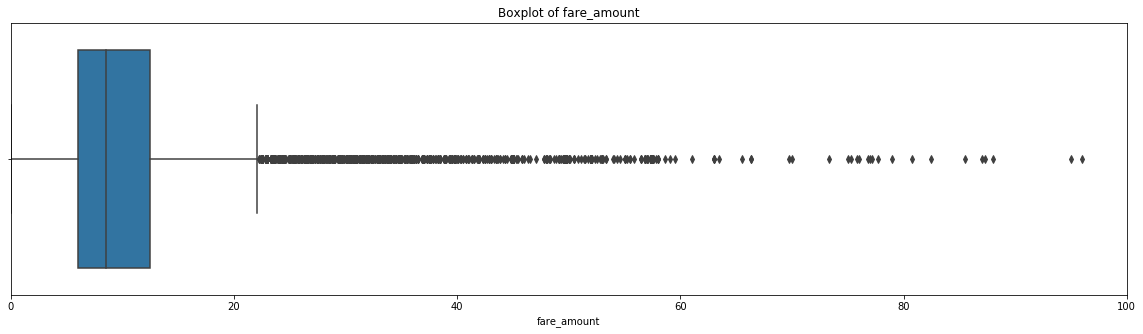

In [31]:
#Univariate Boxplot for target variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],data=train,orient='h')
plt.title('Boxplot of fare_amount')
#plt.savefig('bp of fare_amount.png')
plt.show()

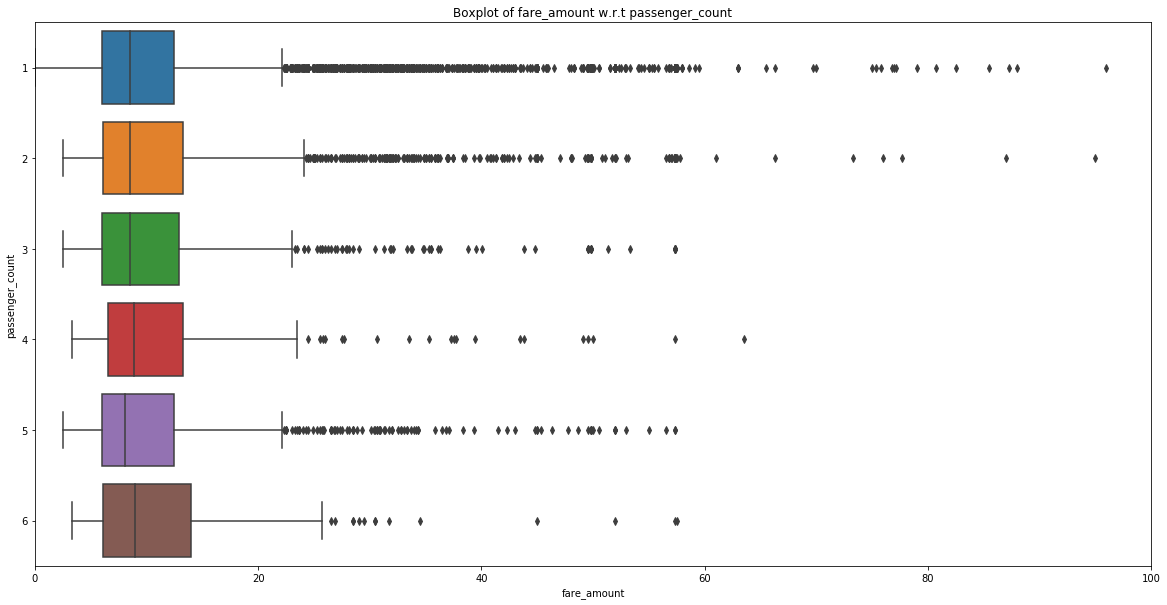

In [32]:
#Bivariate Boxplots: Boxplot for Numerical Variable Vs Categorical Variable
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],data=train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
#plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

In [33]:
#As we see from the above boxplots, there are outliers in the train dataset.
#Outliers Treatment
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(train[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    train.loc[train[col] < minimum,col] = np.nan
    train.loc[train[col] > maximum,col] = np.nan

In [34]:
#outlier_treatment('fare_amount')
#outlier_treatment('pickup_longitude')
#outlier_treatment('pickup_latitude')
#outlier_treatment('dropoff_longitude')
#outlier_treatment('dropoff_latitude')
#Outliers for pickup_longitude, pickup_latidude, dropoff_longitude, dropoff_latidude will be solved after feature engineering.

In [35]:
train.loc[train['fare_amount'] > 500]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1015,54343.0,2015-02-27 17:03:50 UTC,-74.003319,40.727455,-73.964470,40.764378,1
1072,4343.0,2012-01-15 20:42:04 UTC,-73.976309,40.751634,-74.014854,40.709044,1


In [36]:
train = train.drop(train[train['fare_amount']>1000].index, axis=0)

In [37]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [38]:
#As it is found Median is very close to Actual Value, we will proceed with imputation via median
#train['pickup_longitude'] = train['pickup_longitude'].fillna(train['pickup_longitude'].median())
#train['pickup_latitude'] = train['pickup_latitude'].fillna(train['pickup_latitude'].median())
#train['dropoff_longitude'] = train['dropoff_longitude'].fillna(train['dropoff_longitude'].median())
#train['dropoff_latitude'] = train['dropoff_latitude'].fillna(train['dropoff_latitude'].median())

# Feature Engineering

In [39]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [40]:
#We will separate pickup_datetime into Year, month, day, day_of_week, hour, minutes
train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
train['hour'] = train['pickup_datetime'].dt.hour

In [41]:
#eliminate all data with same pickup and drop points
train=train[np.logical_and(train['pickup_longitude'] != train['dropoff_longitude'],
                                     train['pickup_latitude'] != train['dropoff_latitude'])]

In [42]:
#Creating new variable 'dist' using haversine function

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371): #Earth's radius in KM
   
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [43]:
train['dist'] = haversine(train['pickup_latitude'], train['pickup_longitude'],
                train['dropoff_latitude'], train['dropoff_longitude'])

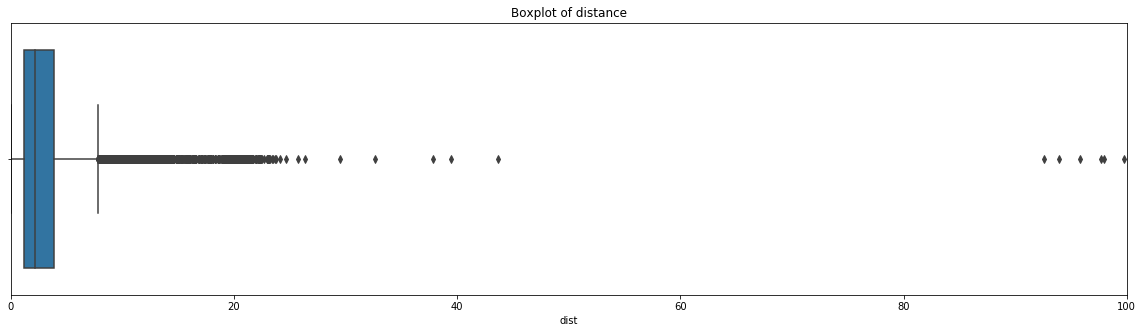

In [44]:
#Univariate Boxplot for dist variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['dist'],data=train,orient='h')
plt.title('Boxplot of distance')
#plt.savefig('bp of fare_amount.png')
plt.show()

In [45]:
df2 = train.copy()

In [46]:
outlier_treatment('dist')

3.8752198997141445 1.2354882167337857
-2.7241093077367524 7.834817424184683


In [47]:
train.isnull().sum()

fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
dayofweek               0
hour                    0
dist                 1361
dtype: int64

In [48]:
#train = train.dropna()

In [49]:
# As median was selected to impute missing values (Outliers in this case). We will impute 'dist' with median.
train['dist'] = train['dist'].fillna(train['dist'].median())

# Feature Selection

In [50]:
#Dropping few variables
#df = train.copy()
df = pd.DataFrame(train)
#df.drop(['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime'], axis = 1)

In [51]:
#Dropping unwanted variables.
train = train.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pickup_datetime'], axis = 1)

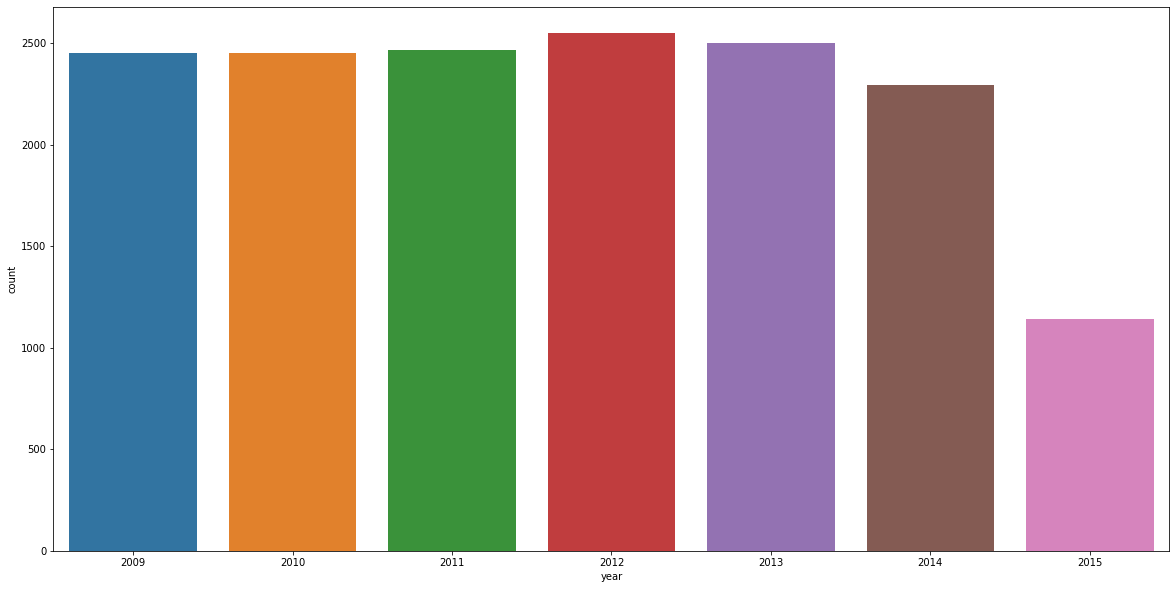

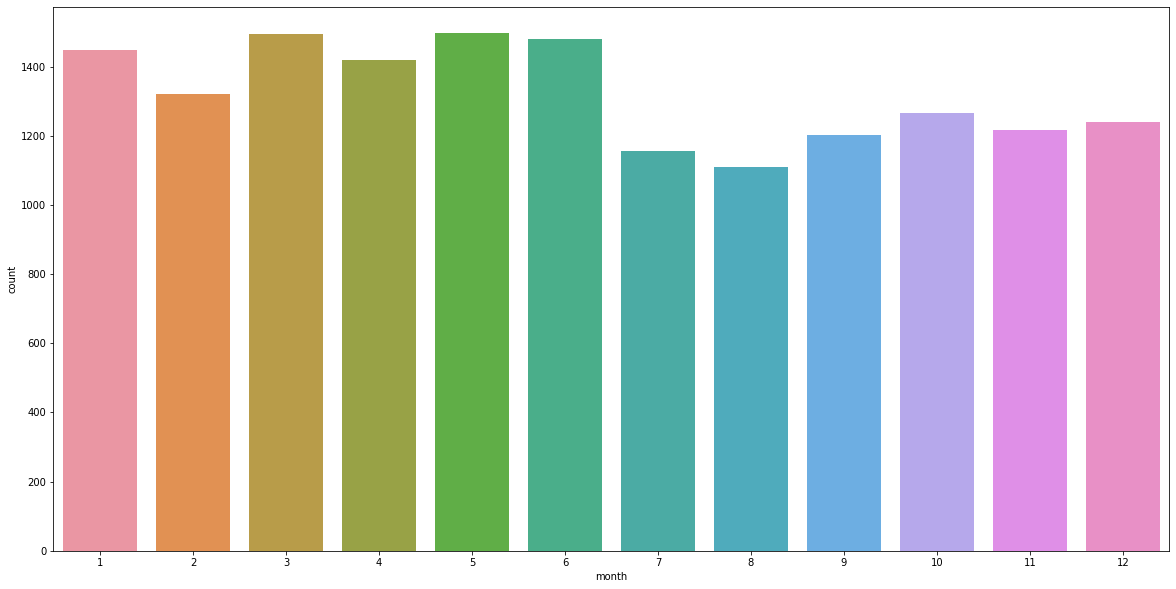

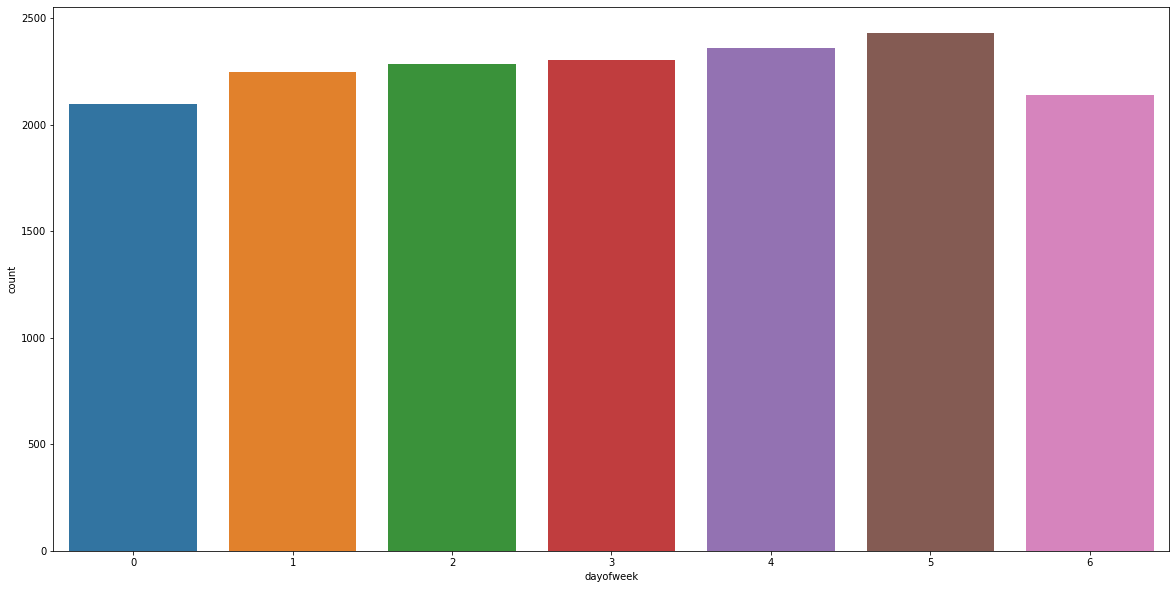

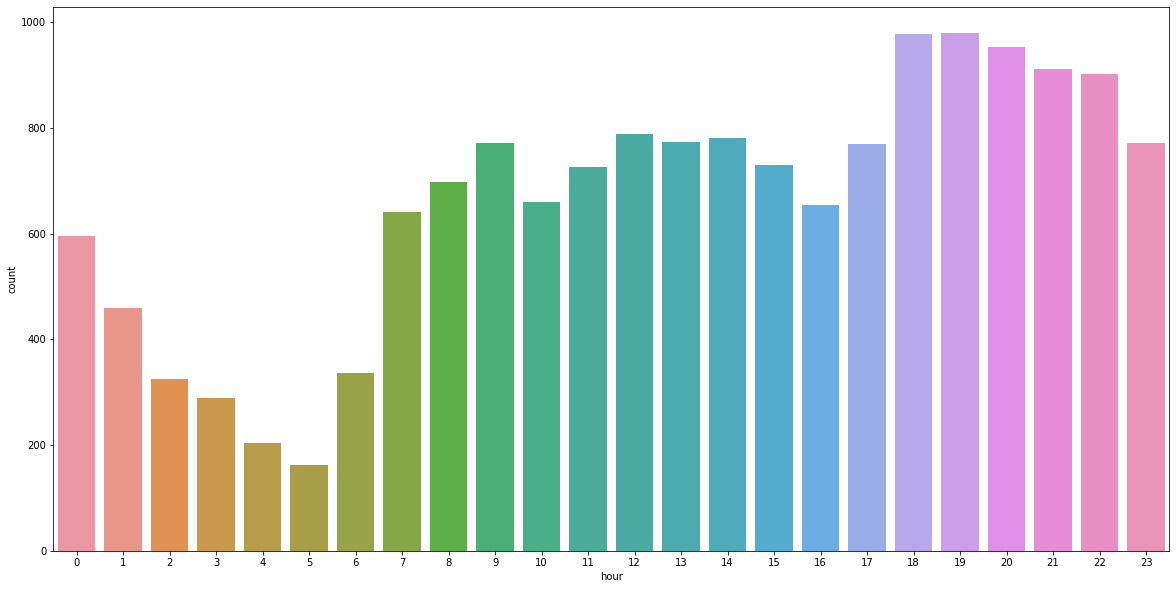

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(train['year'])
#plt.savefig('year.png')

plt.figure(figsize=(20,10))
sns.countplot(train['month'])
#plt.savefig('month.png')

plt.figure(figsize=(20,10))
sns.countplot(train['dayofweek'])
#plt.savefig('day_of_week.png')

plt.figure(figsize=(20,10))
sns.countplot(train['hour'])
#plt.savefig('hour.png')

In [53]:
train.shape

(15854, 7)

In [54]:
train.head()

,fare_amount,passenger_count,year,month,dayofweek,hour,dist
0,4.5,1,2009,6,0,17,1.030764
1,16.9,1,2010,1,1,16,1.954668
2,5.7,2,2011,8,3,0,1.389525
3,7.7,1,2012,4,5,4,2.799270
4,5.3,1,2010,3,1,7,1.999157


In [55]:
#Correlation Analysis
numeric=['fare_amount', 'dist']
cat=['passenger_count', 'year', 'month', 'hour', 'dayofweek']
train_corr = train.loc[:,numeric]

In [56]:
train.head()

,fare_amount,passenger_count,year,month,dayofweek,hour,dist
0,4.5,1,2009,6,0,17,1.030764
1,16.9,1,2010,1,1,16,1.954668
2,5.7,2,2011,8,3,0,1.389525
3,7.7,1,2012,4,5,4,2.799270
4,5.3,1,2010,3,1,7,1.999157


             fare_amount      dist
fare_amount     1.000000  0.248835
dist            0.248835  1.000000


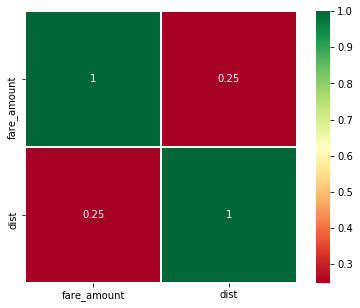

In [57]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = train_corr.corr()
print(corr)

#Plotted using seaborn library
sns.heatmap(train[numeric].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)

As we can see from above correlation plot fare_amount and dist is correlated to each other.

#Chi-square test of Independence for Categorical Variables/Features

Hypothesis testing :

     Null Hypothesis: 2 variables are independent.
     Alternate Hypothesis: 2 variables are not independent.
     
-> If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.
-> And if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent.
-> There should be no dependencies between Independent variables.
-> So we will remove that variable whose p-value with other variable is low than 0.05.
-> And we will keep that variable whose p-value with other variable is high than 0.05

In [58]:
#loop for chi square values
for i in cat:
    for j in cat:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(train[i], train[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p)
            else:
                print(i,"and",j,"are independent on each other with",p)

passenger_count and year are dependent on each other with 5.4539739238701985e-31
passenger_count and month are independent on each other with 0.11697182361640901
passenger_count and hour are dependent on each other with 1.2019669644330902e-12
passenger_count and dayofweek are dependent on each other with 5.853954037949979e-16
year and passenger_count are dependent on each other with 5.4539739238702755e-31
year and month are dependent on each other with 1.2741275343224633e-185
year and hour are independent on each other with 0.14366550222905283
year and dayofweek are independent on each other with 0.19098248153827446
month and passenger_count are independent on each other with 0.11697182361640901
month and year are dependent on each other with 1.2741275343224633e-185
month and hour are independent on each other with 0.6181006743575543
month and dayofweek are independent on each other with 0.1888768522062891
hour and passenger_count are dependent on each other with 1.2019669644330914e-12

In [59]:
#ANOVA Analysis
model = ols('fare_amount ~ C(passenger_count)+C(year)+C(month)+C(dayofweek)+C(hour)',data=train).fit()
                
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count),5.0,2.828216e+03,565.643267,5.055336,1.241770e-04
C(year),6.0,2.034440e+04,3390.733858,30.304079,2.284210e-36
C(month),11.0,6.459352e+03,587.213829,5.248119,2.535244e-08
C(dayofweek),6.0,1.303777e+03,217.296135,1.942045,7.026184e-02
C(hour),23.0,9.145410e+03,397.626514,3.553716,1.759060e-08
Residual,15802.0,1.768091e+06,111.890345,NaN,NaN


Every variable has p-value less than 0.05 therefore we reject the null hypothesis.

# Feature Scaling

In [60]:
train[numeric].var()

fare_amount    114.058688
dist             2.563591
dtype: float64

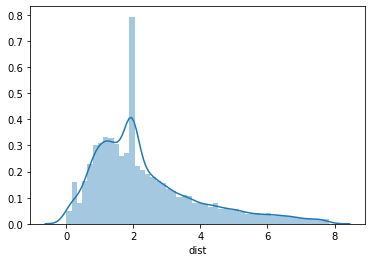

In [61]:
sns.distplot(train['dist'],bins=50)
# plt.savefig('distplot.png')

((array([-3.92303791, -3.70397834, -3.58398416, ...,  3.58398416,
          3.70397834,  3.92303791]),
  array([2.01868456e-04, 2.37856157e-04, 2.79161656e-04, ...,
         7.81429837e+00, 7.81940990e+00, 7.82314249e+00])),
 (1.5191440710987194, 2.3725596284926063, 0.9486059849811295))

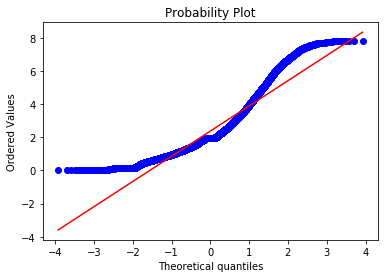

In [62]:
plt.figure()
stats.probplot(train['dist'], dist='norm', fit=True,plot=plt)
# plt.savefig('qq prob plot.png')

In [63]:
#Normalization
train['dist'] = (train['dist'] - min(train['dist']))/(max(train['dist']) - min(train['dist']))

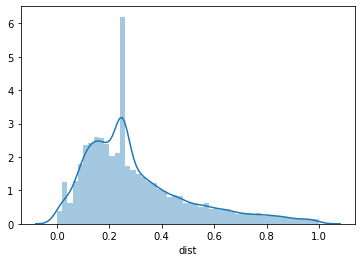

In [64]:
sns.distplot(train['dist'],bins=50)
#plt.savefig('distplot.png')

# Model Development

In [65]:
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [66]:
# Divide the data into train and test
train1, test1 = train_test_split(train, test_size=0.2)

In [67]:
train1.shape

(12683, 7)

In [68]:
train.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'dayofweek', 'hour',
       'dist'],
      dtype='object')

In [69]:
#Linear Regression
#Combine all the values in one array
values=['fare_amount', 'year','month', 'dayofweek', 'hour', 'dist']
linear_Data = train[values]

In [70]:
#This function is developed to get columns for specific passenger count. The idea is developed from R linear regression fit, 
#which explains all the passenger count individualy contributes in the model 

cat_names = ['passenger_count'] 
for i in cat_names:
    temp = pd.get_dummies(train[i], prefix= i)
    linear_Data = linear_Data.join(temp)

In [71]:
#Spliting the newly created data set with passenger count dummies
train1, test1 = train_test_split(linear_Data, test_size=0.2)

In [72]:
train1.iloc[:, 1:12]

,year,month,dayofweek,hour,dist,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
9732,2010,10,4,14,0.847913,1,0,0,0,0,0
14393,2012,12,2,12,0.249838,0,0,0,0,0,1
37,2012,1,3,10,0.121642,1,0,0,0,0,0
9493,2012,5,3,20,0.317243,0,0,0,0,1,0
15686,2014,5,3,9,0.696443,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8090,2010,5,4,16,0.249838,1,0,0,0,0,0
11294,2015,1,3,19,0.006284,0,0,1,0,0,0
12298,2013,10,2,14,0.953744,0,1,0,0,0,0
14426,2010,10,6,17,0.275684,1,0,0,0,0,0


In [73]:
# Train the model using the training sets
model = sm.OLS(train1.iloc[:, 0].astype(float), train1.iloc[:, 1:12].astype(float)).fit()

In [74]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          2.40e-202
Time:                        13:58:51   Log-Likelihood:                -47749.
No. Observations:               12683   AIC:                         9.552e+04
Df Residuals:                   12672   BIC:                         9.560e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
year                  0.6204      0.051     12.272      0.000       0.521       0.720
month                 0.1236      0.027      4.555      0.000       0.070       0.177
dayofweek            -0.0737      0.047     -1.551      0.121      -0.167       0.019
hour                 -0.0452      0.014     -3.156      0.002      -0.073      -0.017
dist                 12.8350      0.455     28.193      0.000      11.943      13.727
passenger_count_1 -1240.8579    101.722    -12.198      0.000   -1440.249   -1041.467
passenger_count_2 -1239.5935    101.721    -12.186      0.000   -1438.982   -1040.205
passenger_count_3 -1240.4099    101.719    -12.194      0.000   -1439.794   -1041.026
passenger_count_4 -1240.5865    101.725    -12.196      0.000   -1439.982   -1041.191
passenger_count_5 -1240.6892    101.706    -12.199      0.000   -1440.048   -1041.331
passenger_count_6 -1241.5740    101.789    -12.198      0.000   -1441.096   -1042.052
==============================================================================
Omnibus:                    23672.140   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        119007895.239
Skew:                          13.630   Prob(JB):                         0.00
Kurtosis:                     476.767   Cond. No.                     5.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# make the predictions by the model
predictions_LR = model.predict(test1.iloc[:,1:12])

In [76]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [77]:
#Calculate MAPE
MAPE(test1.iloc[:,0], predictions_LR)

47.99919382282029

In [78]:
#Error - 47.99919382282029
#Accuracy - 52.00080617717971

In [79]:
# Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train1.iloc[:, 1:12], train1.iloc[:,0])

In [80]:
fit_DT

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [81]:
#Apply model on test data
predictions_DT = fit_DT.predict(test1.iloc[:,1:12])

In [82]:
MAPE(test1.iloc[:,0], predictions_DT)

35.2988778277751

In [83]:
#Error = 35.2988778277751
#Accuracy = 64.7011221722249

In [84]:
#Random Forest for regression
RF_model = RandomForestRegressor(n_estimators = 10).fit(train1.iloc[:, 1:12], train1.iloc[:,0])

In [85]:
RF_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
RF_Predictions = RF_model.predict(test1.iloc[:, 1:12])

In [87]:
MAPE(test1.iloc[:,0], RF_Predictions)

27.48467609783952

In [88]:
# Error = 27.48467609783952
#Accuracy = 72.51532390216048

# Prediction On Original Test Data 

In [89]:
#Loading Test Data
pred=(pd.read_csv('test.csv', header = 0 ))

In [90]:
#Changing the 'pickup_datetime' type from object to datetime
pred['pickup_datetime'] =  pd.to_datetime(pred['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [91]:
pred.shape

(9914, 6)

In [92]:
# we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

pred['year'] = pred['pickup_datetime'].dt.year
pred['Month'] = pred['pickup_datetime'].dt.month
pred['Day'] = pred['pickup_datetime'].dt.dayofweek
pred['Hour'] = pred['pickup_datetime'].dt.hour

In [93]:
pred.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Day,Hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21


In [94]:
#create dist variable
pred['dist'] = \
    haversine( pred['pickup_latitude'], pred['pickup_longitude'],
                 pred['dropoff_latitude'], pred['dropoff_longitude'])


In [95]:
#Dropping Unwanted variables
pred = pred.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pickup_datetime'], axis = 1)

In [96]:
pred['fare_amount']=0
pred['passenger_count']=pred['passenger_count'].astype('category')

In [97]:
pred.shape

(9914, 7)

In [98]:
# Build model on the entire Train data
RF_model = RandomForestRegressor(n_estimators = 10).fit(train.iloc[:, 1:7], train.iloc[:,0])

#predict value
pred['fare_amount'] = RF_model.predict(pred.iloc[:, 0:6])

In [100]:
#write output to csv

#pred.to_csv("Predicted_Values.csv", index = False)